### This is Credit card Marketing dataset. Since we are performing Clustering to split data into groups, there is no target variable and this is an Unsupervised problem. Let us build a model using K-means algorithm and see how many clusters are optimal for this dataset.

### Let's perform EDA first

In [1]:
%config IPCompleter.greedy=True
# To see the possible option that you can substitute with the half completed snippet
# To know the possible arguments a method or function takes or the type of parameters it accepts or-
# -its returns, type Just Press Shift + Tab together

#### Step 1: Download all the libraries which we generally use while performing EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from scipy import stats
from scipy.stats import norm
import sklearn.preprocessing as pp
from sklearn.metrics import silhouette_score

#### Step 2: Import the data set on which EDA has to be performed

In [3]:
creditcard_df = pd.read_csv("Credit card Marketing Case Study.csv")

#### Step 3: Analyse the dataset and get to know which type of problem it is
    a. We are performing EDA on Credit card Marketing dataset.
    b. The main intention of building a model on Credit card Marketing dataset is to create clusters.
    c. Based on type of data in the clusters, marketing campaign will be created for each cluster.

#### Step 4: Fetch a few rows to get a gist of the attributes in the data set, whether there are any attributes which are not adding value to the target variable, etc.

In [4]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


##### Based on the data above, we can get to know that "CUST_ID" is the only attribute which is not adding any information to the dataset. Rest of them are all related to Credit card transactions. But, we'll remove "CUST_ID" after applying "Duplicated()" function so that data doesn't get missed.

#### Step 5: Get to know the structure of the data set using 'info()'method

In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

##### Since we are working on K-means, it is better to have unlabeled data. By looking at the data above, we can say that all the attributes except "CUST_ID" are unlabeled. We don't have to worry about "CUST_ID" because we are going to remove that attribute. Also, none of the attributes except "MINIMUM_PAYMENTS" and "CREDIT_LIMIT" have null values.

#### Step 6: Get the 6-point summary using 'describe()' method

In [6]:
# Since there are many rows, we are transposing(converting rows to columns and vice versa) the table
creditcard_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


##### By looking at values below, there are a few interesting points to note:
    a. Values in all the attributes except 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'TENURE' are unsymmetric, i.e. data in rest of the attributes are skewed.

#### Step 7: Since we don't have any categorical attributes, we can skip to univariate analysis on numerical attributes.

#### Step 8: Check the type of distribution continuous attributes have and compare it with Normal distribution. In this analysis, we are not trying to figure out how many clusters we can create. Instead, we are trying to figure out whether this dataset can be used a build a clustering based model. 

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

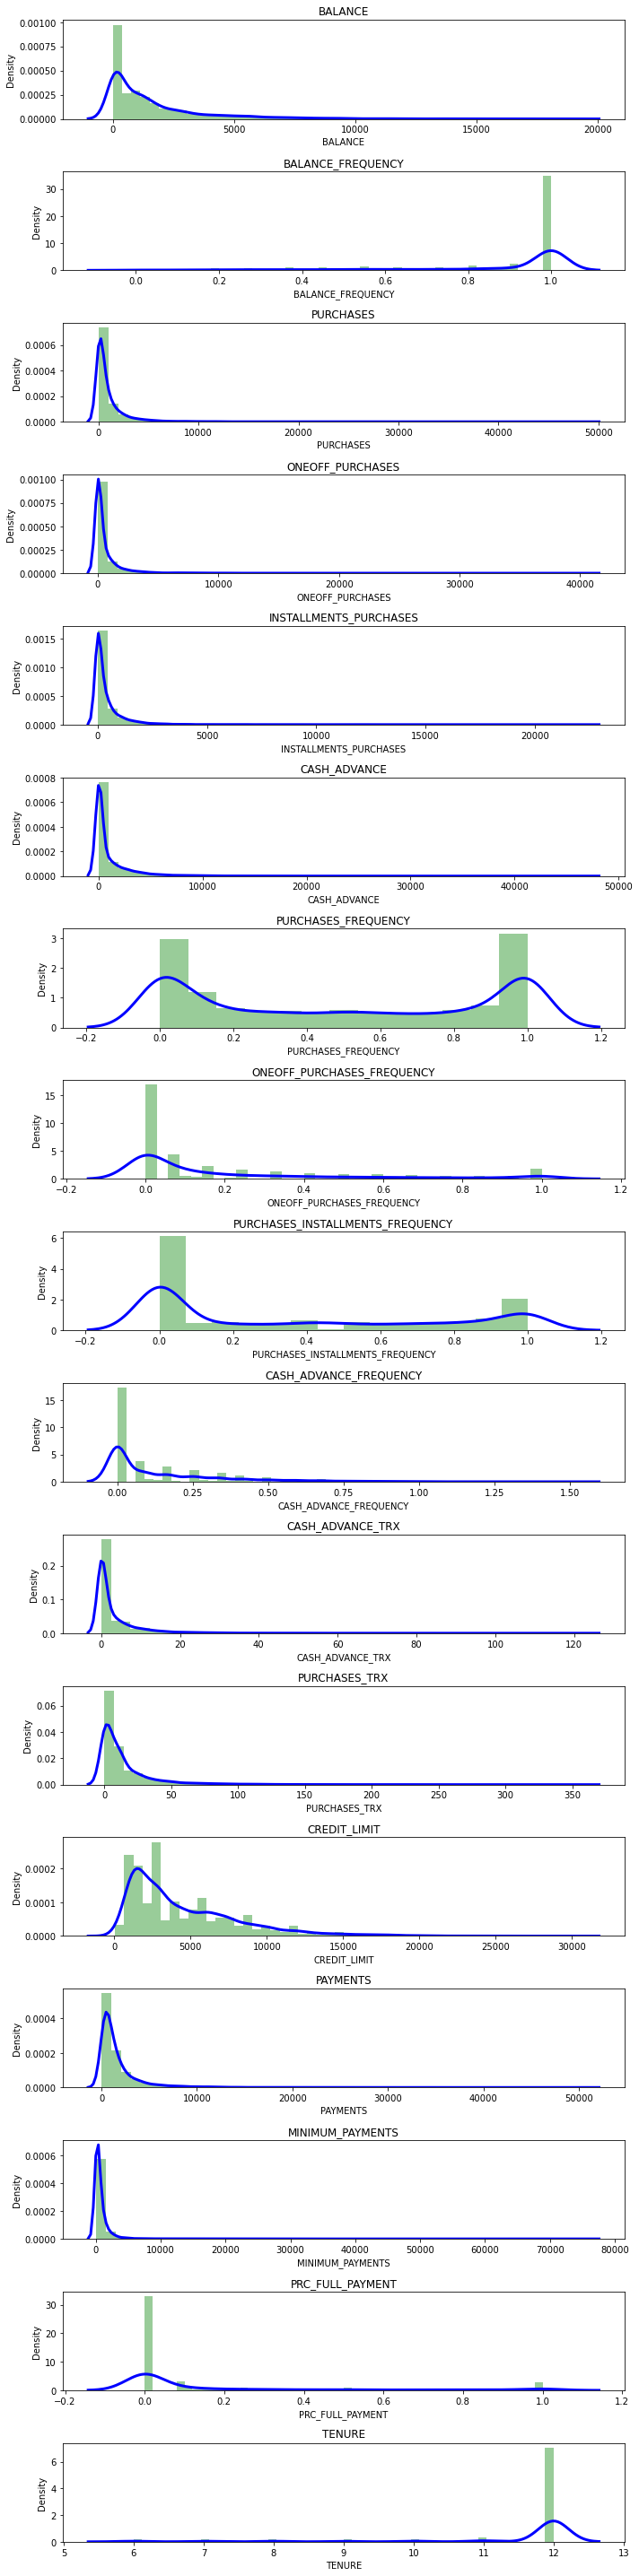

In [7]:
plt.figure(figsize=(10,40))
for i in range(1, len(creditcard_df.columns)):
  plt.subplot(17, 1, i)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

##### Based on the graphs above, attributes 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',  'PURCHASES_INSTALLMENTS_FREQUENCY' and 'CREDIT_LIMIT' will help us create clusters. So, now we know that we can build a clustering based model.

#### Step 9: Perform Bivariate analysis. We can skip this step as Bivariate analysis is performed in Supervised problems to get to know about Multicollinearity problem. In Unsupervised problems, it is not needed.

#### Step 10: Identification and treatment of Missing values.

In [8]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot:>

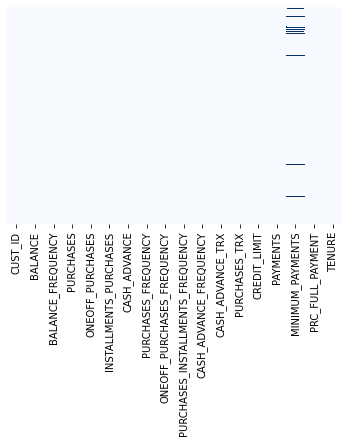

In [9]:
# check for missing values
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

##### As we already know, 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT' have null values. There are 313 missing values in 'MINIMUM_PAYMENTS', around 3.3%, and one missing value in payments. We will replace missing values in 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS' with Median and proceed with further steps.

In [10]:
# Fill up the missing elements with Median of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].median()

In [11]:
# Fill up the missing elements with Median of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].median()

In [12]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Step 11: Check whether there are any outliers. If there are analyze them and understand whether they have to be seperated from the dataset and analysed or just remove them. Since K-means algorithm is based on distances, outliers will change the models all together. It would be a good way to minimise the outliers. If the outliers are important, then it would be a good idea to analyse them seperately.

##### Since we haven't dropped "CUST_ID" attribute, Outlier function may not work properly. We'll perform rest of the steps in EDA and comeback to Outlier treatment at the end of EDA.

#### Step 12: This is the last step of EDA. In this step we try to find the duplicate rows using 'duplicated()' function.

In [13]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

##### There are no duplicates. But, as we noted earlier, 'CUST_ID' attribute is not needed while model building. So let's remove that and then proceed with model building steps.

In [14]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [15]:
# To check whether 'CUST_ID' attribute is dropped.
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


##### Now that 'CUST_ID' attribute is dropped, let's perform Outlier Treatment and close EDA.

<AxesSubplot:>

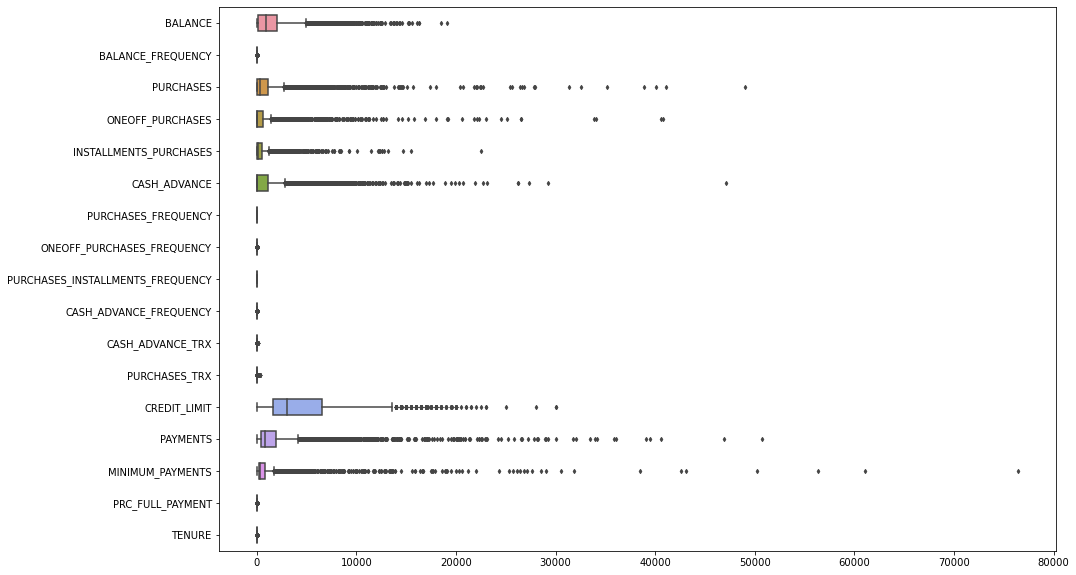

In [16]:
# orient="h" will transpose(converting rows to columns and vice versa) the plot
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = creditcard_df,width=0.5,ax=ax,fliersize=3, orient="h")

##### We can get to know that there are many Outliers in the table and all the columns are right skewed. It would be a better approach to remove them and analyse seperately. But as of now, we will remove the rows based on Z-score. Now we will remove rows having values which are either lower than Z = (-3) or higher than Z = 3. Here we will check values which are in this category in all the attributes and then exclude the row. The idea behind lower than Z = (-3) or higher than Z = 3 is that in Normal distribution, 99.7% of the values lie in this region. So, we are using this to exclude Outliers.

In [17]:
# We'll calculate Z-score for each attribute and convert the data into Z-scores
z = np.abs(stats.zscore(creditcard_df))

# Now we'll remove the values wherever Z-score is less than -3 (or) greater than 3
creditcard_df_new = creditcard_df[(z < 3).all(axis=1)]

##### Both Z-score approach and IQR based approach are the same ideas. If Z-score is less than -3 it means that the value is less than (Q1 - 1.7 IQR) and if Z-score is greater than 3 it means that the value is greater than (Q3 + 1.7 IQR)

In [18]:
creditcard_df_new.shape

(7434, 17)

##### Now that we have removed more than 15% of the data, let's check whether the attributes we have found earlier still show the scope for Clustering and whether any other attributes are also creating the scope.

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

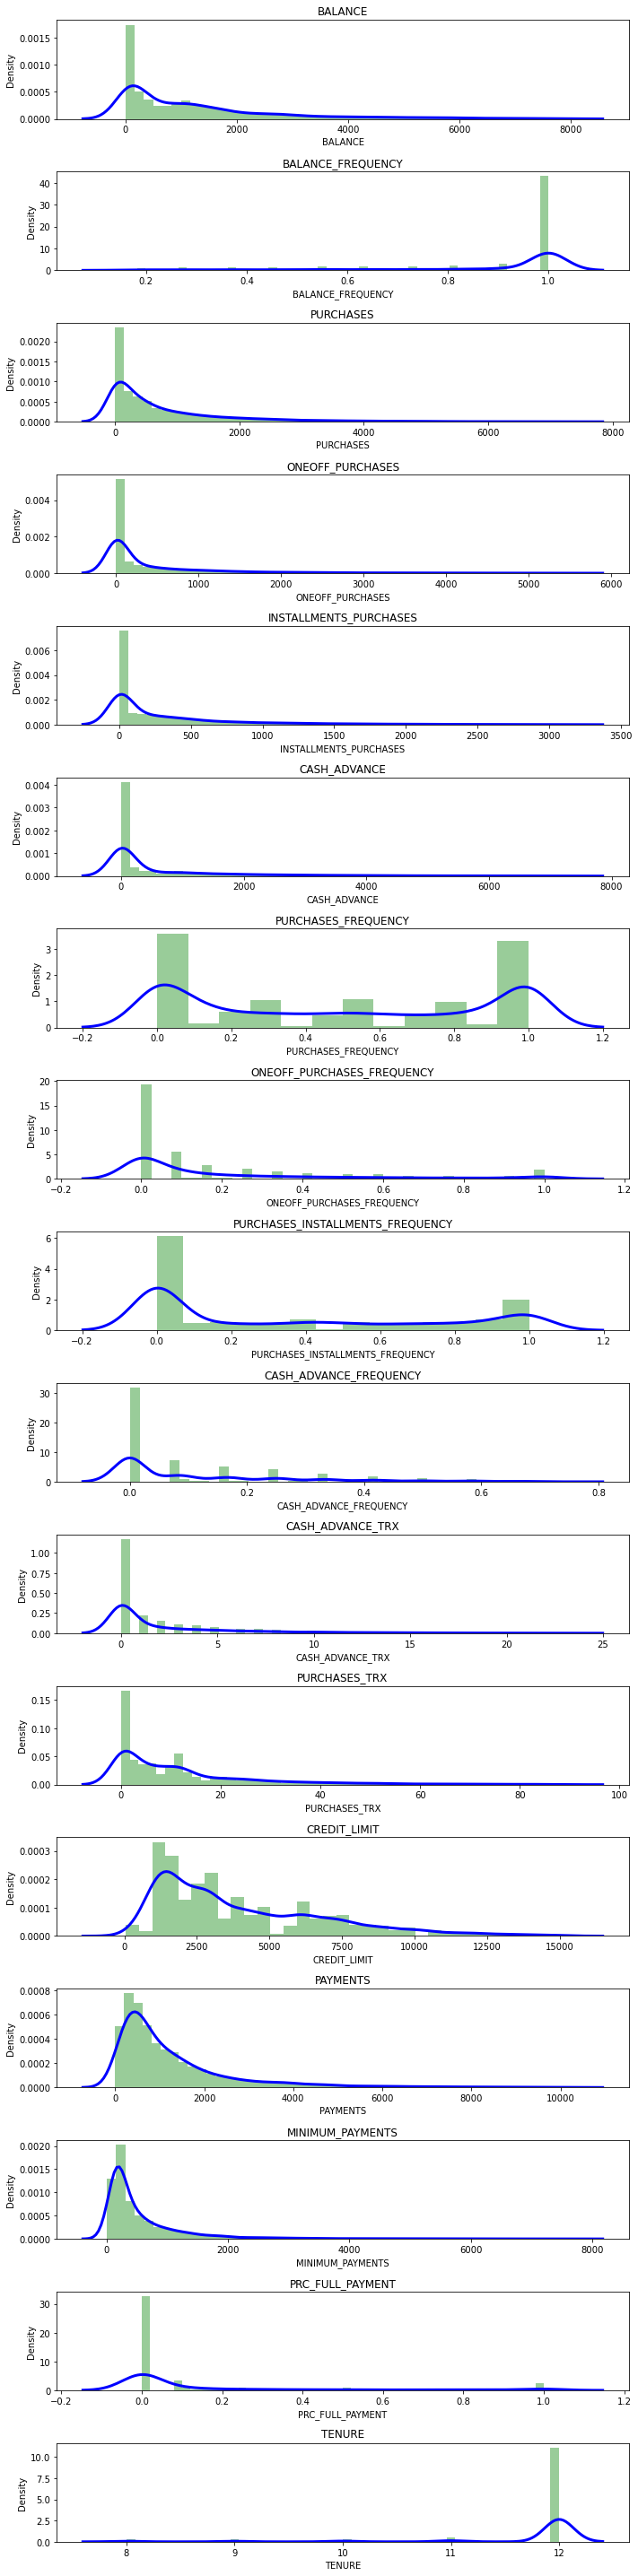

In [19]:
plt.figure(figsize=(10,40))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df_new[creditcard_df_new.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

##### Based on the graphs above, along with 'PURCHASES_FREQUENCY',  'PURCHASES_INSTALLMENTS_FREQUENCY' and 'CREDIT_LIMIT' attributes, the ones which showed scope for clustering before removing outliers, 'BALANCE', 'CASH_ADVANCE_FREQUENCY' and 'PURCHASES_TRX' are also showing scope for creating clusters.

### Let's start with model building steps.

##### Since we are applying K-means(Clustering) algorithm, we have to perform scaling before biulding the model.

#### Pre-step: Since data is right skewed, let's apply log transformation and see whether we get better results

In [20]:
creditcard_df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
# Applying log transformation
# Note: Adding 1 for each value to avoid infinite values

cols =  ['BALANCE',
         'PURCHASES',
         'ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES',
         'CASH_ADVANCE',
         'ONEOFF_PURCHASES_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY',
         'CASH_ADVANCE_TRX',
         'PURCHASES_TRX',
         'CREDIT_LIMIT',
         'PAYMENTS',
         'MINIMUM_PAYMENTS',
         'PRC_FULL_PAYMENT'
        ]


creditcard_df_new[cols] = np.log(1 + creditcard_df_new[cols])

creditcard_df_new.head()

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,12
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,12
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12


#### Step 1: Standardize the data using 'pp.StandardScaler()' method and apply 'pp.normalize()' so that values will be within -1 to 1 range
    a. pp.StandardScaler(): This method will transform data into Z-score
    b. pp.normalize(): This method will transform data in such a way that all the observations will have value  between -1 and 1

In [22]:
# Standardize data
scaler = pp.StandardScaler() 
creditcard_df_scaled = scaler.fit_transform(creditcard_df_new) 
  
# Normalizing the Data 
normalized_df = pp.normalize(creditcard_df_scaled)
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

normalized_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000
mean,0.008397,0.017764,0.010652,0.005772,0.006792,-0.012041,-0.001099,-0.006522,-0.000736,-0.017785,-0.016181,0.004064,-0.007706,0.002315,0.002258,-0.015242,0.020097
std,0.242423,0.228018,0.242402,0.261008,0.261030,0.259924,0.250241,0.240712,0.256280,0.236626,0.245373,0.243620,0.256303,0.215294,0.239557,0.236633,0.193662
min,-0.646184,-0.776987,-0.547701,-0.525408,-0.512852,-0.471489,-0.440177,-0.383951,-0.426955,-0.383111,-0.420155,-0.434740,-0.791380,-0.931581,-0.800148,-0.368216,-0.896909
25%,-0.179438,0.019259,-0.097371,-0.244639,-0.259472,-0.240378,-0.248546,-0.178872,-0.219863,-0.195321,-0.214207,-0.235400,-0.217595,-0.124439,-0.171314,-0.156752,0.065709
50%,0.082565,0.120122,0.098394,0.042013,0.104386,-0.168779,0.007613,-0.116993,-0.112399,-0.137142,-0.150402,0.054659,-0.003957,0.019148,-0.033667,-0.123355,0.078420
75%,0.203305,0.145397,0.193041,0.258103,0.247480,0.257788,0.257064,0.117779,0.251449,0.127770,0.196452,0.203827,0.201033,0.150549,0.183799,0.026106,0.091627
max,0.490087,0.338152,0.433817,0.579976,0.581059,0.574387,0.504019,0.719983,0.577323,0.741741,0.644630,0.501626,0.630130,0.569132,0.812113,0.736196,0.204126


In [23]:
creditcard_df_scaled.view()

array([[-1.27205636, -0.33491067, -0.10717713, ..., -0.82708963,
        -0.56314358,  0.31218731],
       [ 1.07276976,  0.09112689, -1.72813748, ...,  1.12507359,
         0.38880665,  0.31218731],
       [ 0.93787451,  0.51716446,  0.63199728, ...,  0.61089472,
        -0.56314358,  0.31218731],
       ...,
       [ 0.36817945, -0.65444001, -1.72813748, ...,  0.01847126,
        -0.56314358, -4.6976356 ],
       [-0.6246637 ,  0.51716446,  0.43313174, ..., -0.93448576,
        -0.56314358, -4.6976356 ],
       [-0.15279377, -0.65444001, -0.16371672, ..., -0.4594441 ,
        -0.56314358, -4.6976356 ]])

#### Step 2: Since we are working with K-means algorithm, we have to get to know how many clusters we need before model building. We can get to know this using Elbow chart and Silhouette score. Let's work on that.

Text(0, 0.5, 'Silhouette Score')

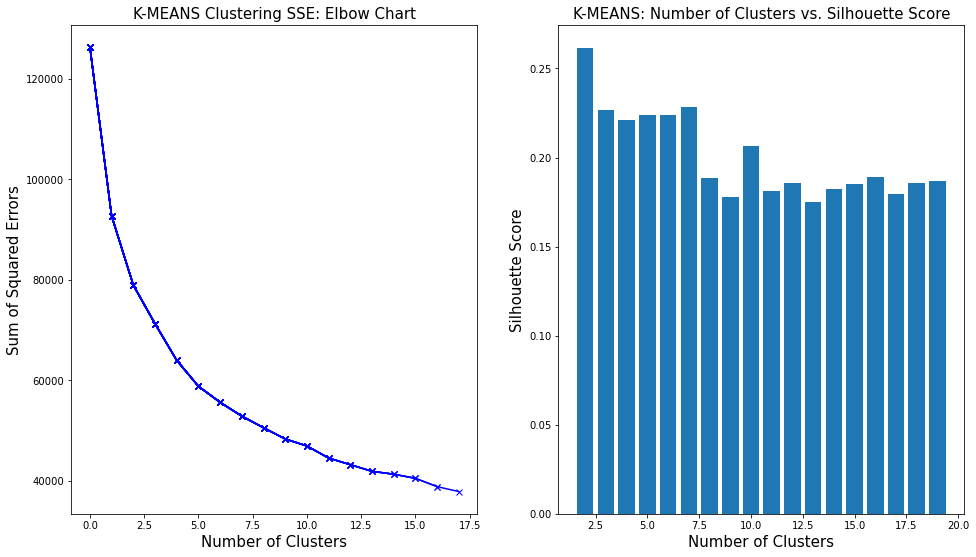

In [24]:
figure = plt.figure(figsize=(16, 9))
elbow = figure.add_subplot(1,2,1) #elbow chart
kmean_sil = figure.add_subplot(1,2,2) #silhouette bar chart

n_clusters=19
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(creditcard_df_scaled)
    cost.append(kmean.inertia_) 
    elbow.set_ylabel('Sum of Squared Errors', fontsize = 15)
    elbow.set_xlabel('Number of Clusters', fontsize = 15)
    elbow.set_title('K-MEANS Clustering SSE: Elbow Chart', fontsize = 15)
    elbow.plot(cost, 'bx-')


silhouette_scores = [] 

for n_cluster in range(2, 20):
    silhouette_scores.append( 
        silhouette_score(creditcard_df_scaled, KMeans(n_clusters = n_cluster).fit_predict(creditcard_df_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19] 
kmean_sil.bar(k, silhouette_scores) 
kmean_sil.set_title('K-MEANS: Number of Clusters vs. Silhouette Score', fontsize = 15)
kmean_sil.set_xlabel('Number of Clusters', fontsize = 15) 
kmean_sil.set_ylabel('Silhouette Score', fontsize = 15)

##### Based on the two graphs above, we can see that 2 is the ideal number of clusters system suggests based on mathematical calculations. In case of Silhouette score,  we can see that 2 has max value.

#### Step 3: Build the models with (+/-)2 values from the ideal K-value we found. If the K-value is less than 5, we can go ahead with (+)2 values from the ideal K-value we found.

##### Since the ideal K-value is 2, let's try with 2, 3, & 4 and find the optimal one. Let's start with K=2 first.

In [25]:
# Building K-means model with K=2
kmeans = KMeans(2,random_state=43)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [26]:
kmeans.cluster_centers_.shape

(2, 17)

In [27]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.303840,-0.078602,0.552384,0.268538,0.462105,-0.562662,0.507271,0.256241,0.418967,-0.501402,-0.531794,0.533885,0.034110,-0.015906,-0.227857,0.226615,0.060453
1,0.565578,0.146313,-1.028225,-0.499866,-0.860177,1.047356,-0.944250,-0.476975,-0.779879,0.933326,0.989898,-0.993791,-0.063493,0.029607,0.424140,-0.421829,-0.112529


##### Above cluster centres are created on the basis of scaled data. So, we inverse transform the data to get unscaled data.

In [28]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5.525990,0.872874,6.42741,3.988353,4.698761,1.128763,0.686789,0.205542,0.521982,0.029242,0.237233,2.554170,8.044836,6.56610,5.569402,0.166481,11.799007
1,7.133954,0.920867,1.97263,1.554798,0.705463,6.653672,0.111518,0.051804,0.051313,0.217321,1.611272,0.573909,7.969645,6.62693,6.248481,0.029789,11.660893


##### Above cluster centres are created on the basis of log transformation. So, we inverse log transformation the data to get unscaled data.

In [29]:
# Reversing log transformation

# Loop to fetch all the column numbers on which Log transformation is applied
cols_to_transform = []
for i in cols:
    for j in range(16):
        if cluster_centers.iloc[:, j].name[0] == i:
            cols_to_transform.append(j)

# Loop to transform cluster centres based on number of clusters formed
for i in cols_to_transform:
    for j in range(cluster_centers.shape[0]):
        # Subtracting '1' which was added while applying log transformation
        cluster_centers.iloc[:, i][j] = np.exp(cluster_centers.iloc[:, i][j])-1
    

# To view cluster centres
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,250.134805,0.872874,617.569487,52.965912,108.810985,2.091828,0.686789,0.228191,0.521982,0.029674,0.267737,11.860621,3116.655294,709.593341,261.277092,0.181141,11.799007
1,1252.824529,0.920867,6.189558,3.734128,1.024784,774.627374,0.111518,0.053170,0.051313,0.242743,4.009179,0.775193,2890.829272,754.160406,516.226462,0.030237,11.660893


##### Based on cluster centres, we can find features of each cluster centre which will standout and represent that cluster. By doing this we can build appropriate marketing campaigns.

##### Cluster-0: 
    a. BALANCE: Cluster-0 has less 'BALANCE' when compared to Cluster-1 though there is not much of a difference in 'CREDIT_LIMIT' between these two clusters. This means that people in Cluster-0 are using credit cards    much more than people in Cluster-1
    
    b. PURCHASES: Cluster-0 has very high 'PURCHASES' when compared to Cluster-1 though there is not much of a  difference in 'BALANCE_FREQUENCY'between these two clusters. This means that people in Cluster-0 may be     doing more purchases and not cash advance transactions. Let's confirm it while anlysing 'CASH_ADVANCE'
    
    c. 'CASH_ADVANCE' & 'CASH_ADVANCE_FREQUENCY': By looking at 'CASH_ADVANCE' & 'CASH_ADVANCE_FREQUENCY' values in Cluster-0, we can get to know that people in Cluster-0 tend to do negligible Cash advance transactions as expected.
    
    d. 'MINIMUM_PAYMENTS' & 'PRC_FULL_PAYMENT': By looking at 'MINIMUM_PAYMENTS' & 'PRC_FULL_PAYMENT' values in Cluster-0, we can get to know that people in Cluster-0 tend to make very less minimum payments and more full payments.
    
    e. By analysing above values, we can say that people in Cluster-0 tend to do more purchases when compared to cash advance transactions and also make more full payments when compared to minimum payments. So, we can    build a marketing campaign encouraging people in cluster-0 to do more purchases and convert them to monthly installments so that they can pay in parts.

##### Cluster-1: 
    a. BALANCE: Cluster-1 has more 'BALANCE' when compared to Cluster-1 though there is not much of a difference in 'CREDIT_LIMIT' between these two clusters. This means that people in Cluster-1 are not using credit cards as much people in Cluster-1
    
    b. PURCHASES: Cluster-1 has negligible 'PURCHASES' when compared to Cluster-1 though there is not much of a difference in 'BALANCE_FREQUENCY'between these two clusters. This means that people in Cluster-1 may be     doing more cash advance transactions. Let's confirm it while anlysing 'CASH_ADVANCE'
    
    c. 'CASH_ADVANCE' & 'CASH_ADVANCE_FREQUENCY': By looking at 'CASH_ADVANCE' & 'CASH_ADVANCE_FREQUENCY' values in Cluster-1, we can get to know that people in Cluster-1 tend to do more Cash advance transactions as      expected.
    
    d. 'MINIMUM_PAYMENTS' & 'PRC_FULL_PAYMENT': By looking at 'MINIMUM_PAYMENTS' & 'PRC_FULL_PAYMENT' values in Cluster-1, we can get to know that people in Cluster-1 tend to make more minimum payments and less full     payments.
    
    e. By analysing above values, we can say that people in Cluster-1 tend to do more cash advance transactions when compared to purchases and also make more minimum payments when compared to full payments. So, we can   build a marketing campaign encouraging people in Cluster-1 to take cash advances when necessary and pay     minimum payments so that their credit score is not impacted.

#### Step 4: Add cluster labels to each observation so that is easy to identify which observation belongs to which cluster.

In [30]:
# Verifying whether the no. of values in labes match with no. of observations using which clusters are formed.
# Verifying min and max value so that we can get to know how the number of clusters

print('Shape of the labels is:',labels.shape)
print('Min value of the labels is:',labels.min())
print('Max value of the labels is:',labels.max())

Shape of the labels is: (7434,)
Min value of the labels is: 0
Max value of the labels is: 1


In [31]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.0


##### Now that we have added Cluster labels to each observation, we can perform multiple activities related to each cluster. Let's see a few examples.

##### Creating a new dataframe only with the elements in cluster-1

In [32]:
creditcard_df_cluster_cluster2=creditcard_df_cluster[creditcard_df_cluster['cluster']==1.0]
creditcard_df_cluster_cluster2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.0
13,921.693369,1.000000,2137.93,419.96,1717.97,0.000000,0.750000,0.166667,0.750000,0.000000,0,26,7500.0,1655.891435,251.137986,0.083333,12,1.0
14,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.000000,12,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7412,2383.427985,1.000000,95.08,95.08,0.00,2437.054164,0.083333,0.083333,0.000000,0.166667,4,3,2500.0,145.154675,16415.732790,0.000000,12,1.0
7413,198.951791,0.250000,0.00,0.00,0.00,1365.186290,0.000000,0.000000,0.000000,0.125000,1,0,2500.0,0.000000,312.343947,0.000000,8,1.0
7426,36.979201,0.181818,0.00,0.00,0.00,4262.120108,0.000000,0.000000,0.000000,0.166667,2,0,2500.0,22099.478120,173.243670,0.000000,12,1.0
7431,38.068219,0.727273,799.92,0.00,799.92,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2500.0,553.927866,85.990408,0.333333,12,1.0


##### Getting the number of observations in each cluster 

In [33]:
pd.crosstab(index=creditcard_df_cluster['cluster'], columns='count')

col_0,count
cluster,
0.0,4842
1.0,2592


##### Plotting histogram of all three clusters for each of the attributes to get to see the distribution

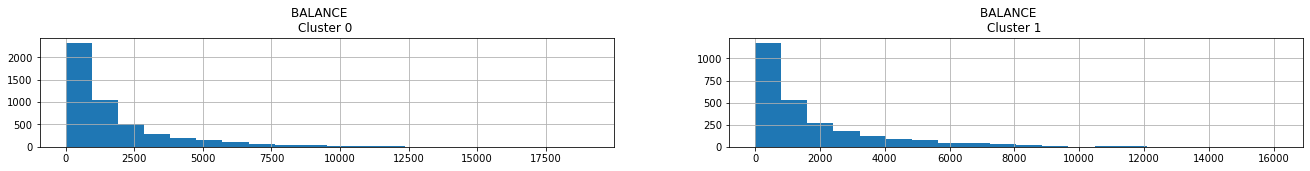

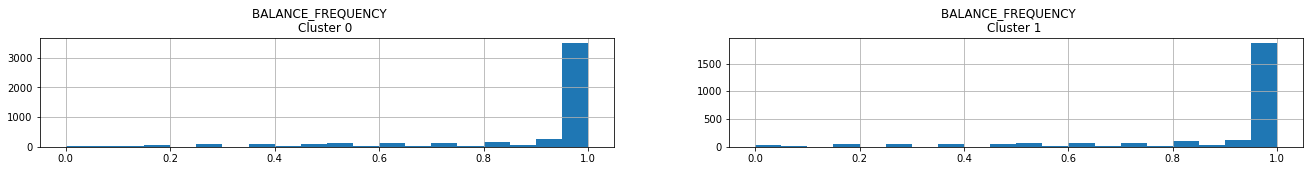

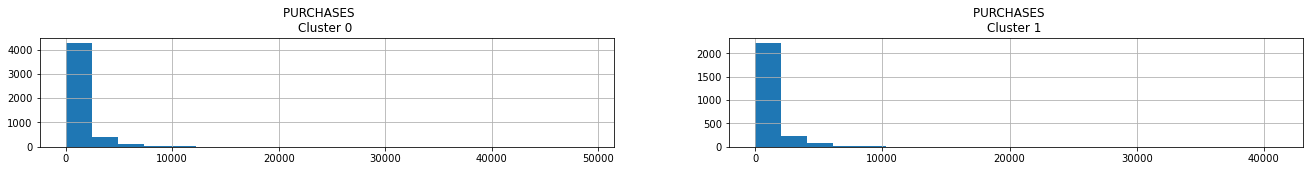

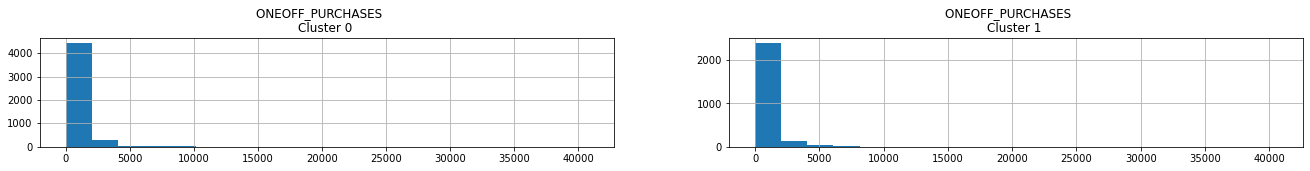

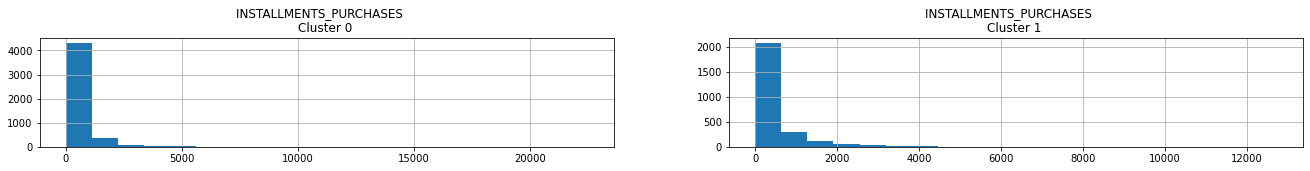

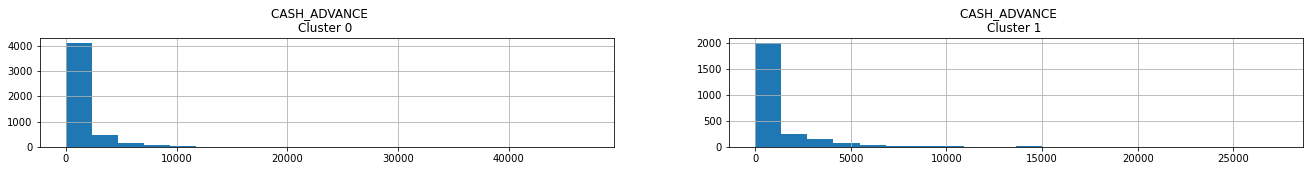

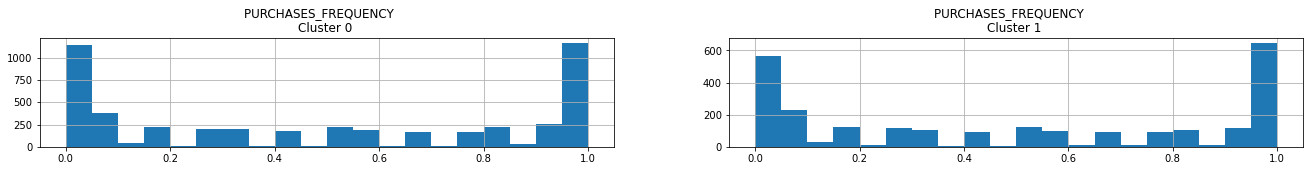

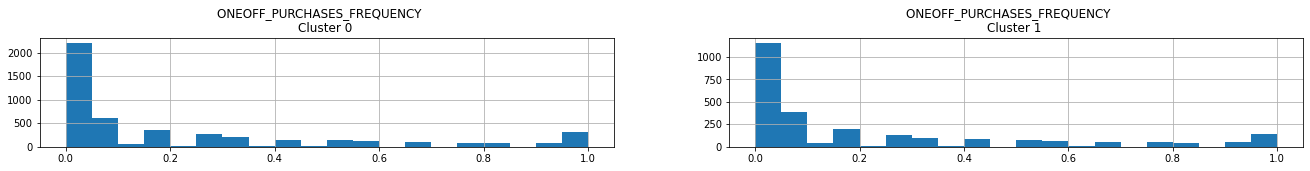

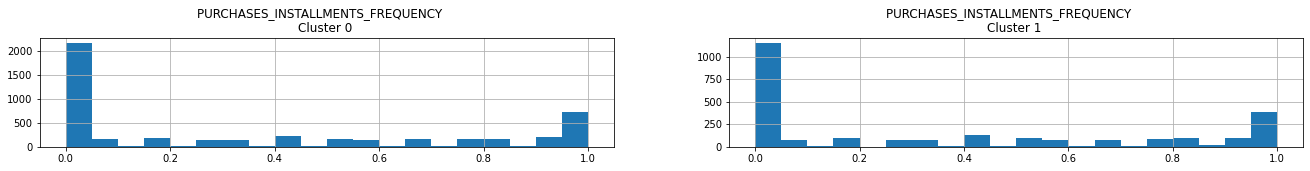

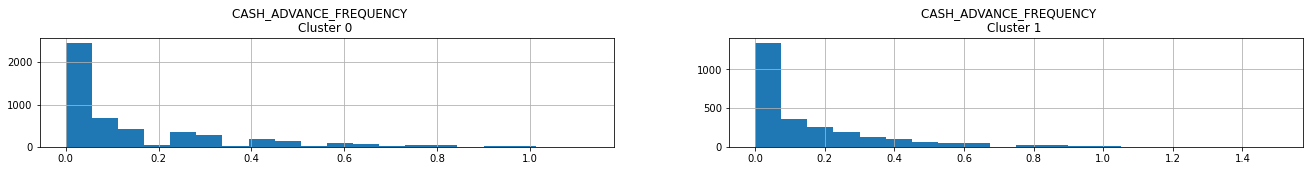

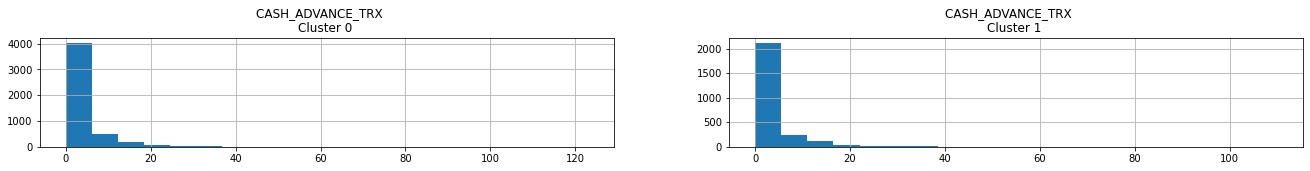

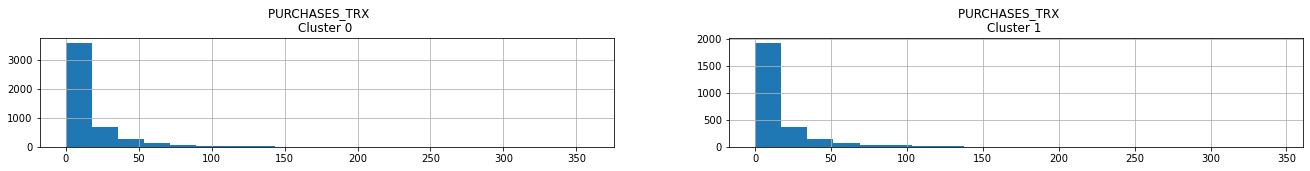

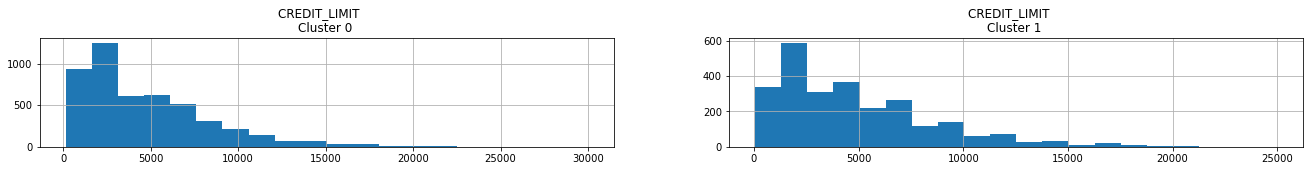

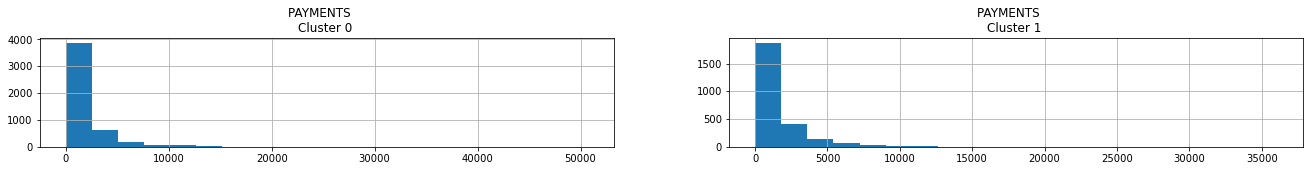

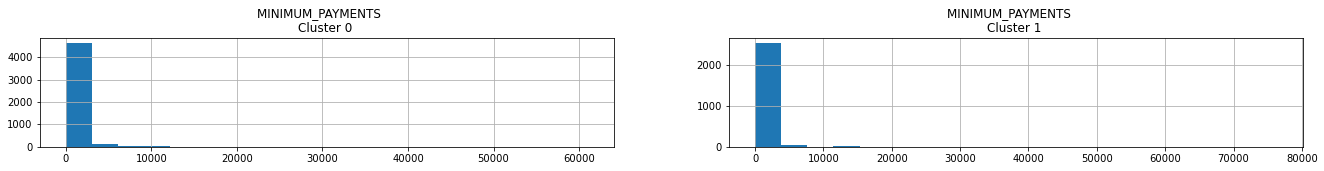

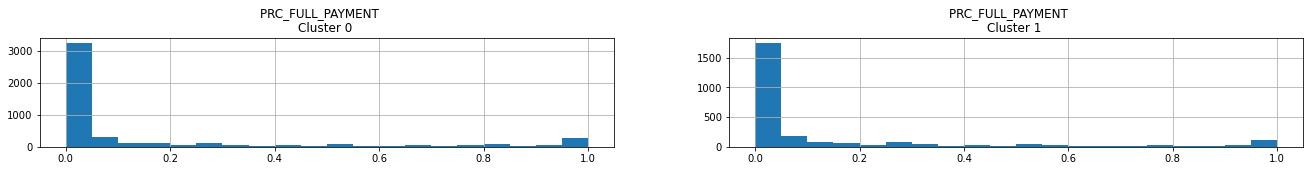

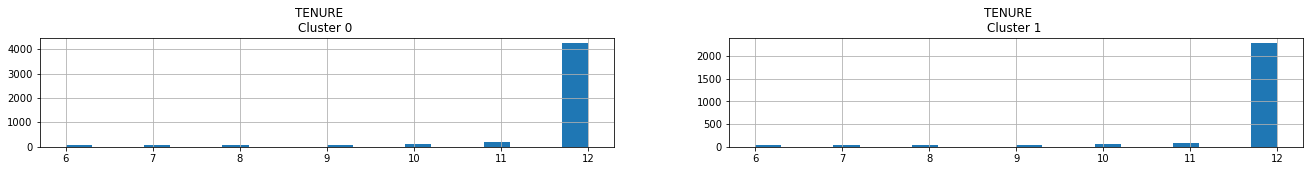

In [34]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 2))
  for j in range(2):
    plt.subplot(1,3,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

##### These distributions will show how data in clusters are distributed. This can be very useful while analysing difference between clusters. 

##### We can perform many other operations. But as of now, let's focus on further steps needed in model evaluation.

#### Step 5: Visualise clusters and see whether there is any overlap between the clusters

##### Before visualising clusters, let's apply PCA(Principal Component Analysis)

In [35]:
# PCA is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning
# These new transformed features are called the Principal Components
# PCA generally tries to find the lower-dimensional surface to project the high-dimensional data
# We can create PCA's of any dimension. Here we are creating 3-dimensional PCA's
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[ 0.0515291 ,  2.73716465, -0.335728  ],
       [ 3.77177392, -0.91670371, -0.15631793],
       [-1.38948487, -1.7553426 ,  2.68835523],
       ...,
       [ 3.56790501,  1.87488921, -0.37930997],
       [-1.16758452,  1.98697674, -1.74250371],
       [ 2.61772471,  1.36873474,  0.31478082]])

In [36]:
pca_df = pd.DataFrame(data = principal_comp, columns =['Pca-1','Pca-2','Pca-3'])
pca_df.head()

,Pca-1,Pca-2,Pca-3
0,0.051529,2.737165,-0.335728
1,3.771774,-0.916704,-0.156318
2,-1.389485,-1.755343,2.688355
3,1.292380,1.254380,1.894304
4,1.079470,1.281364,0.794582


In [37]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,Pca-1,Pca-2,Pca-3,cluster
0,0.051529,2.737165,-0.335728,0
1,3.771774,-0.916704,-0.156318,1
2,-1.389485,-1.755343,2.688355,0
3,1.292380,1.254380,1.894304,1
4,1.079470,1.281364,0.794582,1


##### Let's visualise clusters now

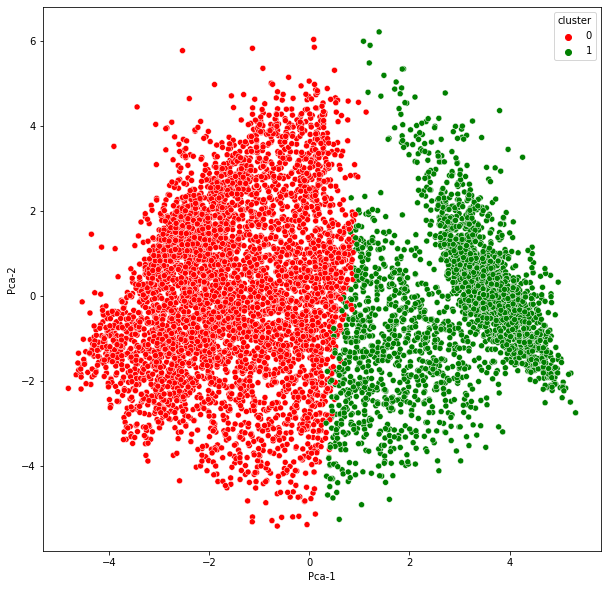

In [38]:
# Let's plot a 2-D scatter plot
# The drawback of using 2-D scatter plot is that we can use only two elements at a time
# Let's use "Pca-1" and "Pca-2" to plot scatter plots
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="Pca-1", y="Pca-2", hue = "cluster", data = pca_df, palette =['red','green'])
plt.show()

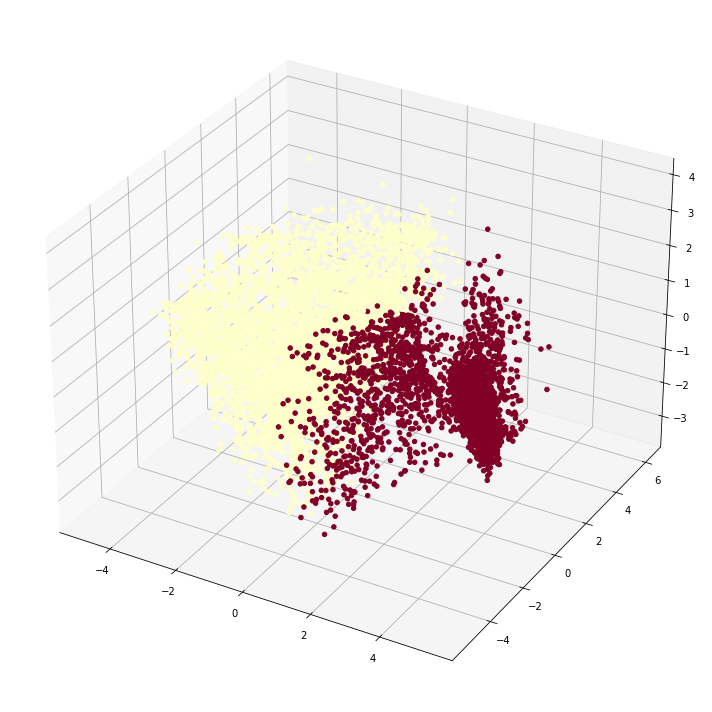

In [39]:
# Let's plot a 3-D scatter plot
# The drawback of 3-D plot is that we cannot see all the points on a 2D screen
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(pca_df['Pca-1'], pca_df['Pca-2'], pca_df['Pca-3'], c=pca_df['cluster'], cmap='YlOrRd', alpha=1)
plt.show()

##### Based on above scatter plots we can say that there is minimal overlap between the clusters. Since we haven't built a two cluster model without Log transformation, we cannot analyse whether Log transformation  is useful.

##### Now that we have built a model for two clusters, let's build model for three clusters and see whether we get better results.

#### Step 3 (Re-execution): Let's build a model with K=3

In [40]:
kmeans = KMeans(3,random_state=43)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [41]:
kmeans.cluster_centers_.shape

(3, 17)

In [42]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.572154,0.158249,-1.181222,-0.601799,-0.958607,1.026853,-1.071275,-0.565984,-0.852822,0.897645,0.954075,-1.139190,-0.100553,-0.003882,0.407378,-0.439115,-0.107265
1,0.424758,0.419901,0.769121,0.811551,0.548877,-0.153174,0.777158,0.863405,0.489940,-0.161467,-0.155246,0.871513,0.305159,0.446397,0.361788,-0.062376,0.146401
2,-1.033119,-0.625306,0.284693,-0.326208,0.315581,-0.826225,0.168789,-0.419246,0.278922,-0.691310,-0.753151,0.128867,-0.244888,-0.497447,-0.802236,0.496903,-0.060108


##### Above cluster centres are created on the basis of scaled data. So, we inverse transform the data to get unscaled data.

In [43]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,7.146116,0.923414,1.541425,1.231973,0.408205,6.583315,0.061175,0.033141,0.022676,0.212644,1.578925,0.385434,7.941094,6.582170,6.231023,0.026145,11.665096
1,6.873511,0.979246,7.038262,5.708087,4.960813,2.533954,0.793751,0.332850,0.549847,0.073804,0.577244,2.991823,8.253649,7.183988,6.183540,0.105562,11.867631
2,4.177211,0.756217,5.672950,2.104775,4.256256,0.224322,0.552641,0.063909,0.467000,0.004347,0.037355,2.029162,7.829900,5.922500,4.971163,0.223457,11.702748


##### Above cluster centres are created on the basis of log transformation. So, we inverse log transformation the data to get unscaled data.

In [44]:
# Reversing log transformation

# Loop to transform cluster centres based on number of clusters formed
for i in cols_to_transform:
    for j in range(cluster_centers.shape[0]):
        # Subtracting '1' which was added while applying log transformation
        cluster_centers.iloc[:, i][j] = np.exp(cluster_centers.iloc[:, i][j])-1
    

# To view cluster centres
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1268.166604,0.923414,3.671242,2.427987,0.504115,721.931890,0.061175,0.033696,0.022676,0.236944,3.849740,0.470253,2809.432798,721.104478,507.275373,0.026490,11.665096
1,965.335111,0.979246,1138.405032,300.294088,141.709807,11.603238,0.793751,0.394938,0.549847,0.076596,0.781123,18.921962,3840.619690,1317.154152,483.704661,0.111335,11.867631
2,64.183789,0.756217,289.891422,7.205257,69.545364,0.251474,0.552641,0.065995,0.467000,0.004356,0.038062,6.607707,2513.677624,372.343819,143.194440,0.250392,11.702748


##### Based on cluster centres, we will see whether we can find features of each cluster centre which will standout and represent that cluster

##### Cluster-0:
    a. BALANCE_FREQUENCY: Cluster-0 has high value in 'BALANCE_FREQUENCY', so people in Cluster-0 do more number of transactions when compared to Cluster-0
    
    b. PURCHASES, ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES: By looking at these three values for Cluster-0, we can say that people in Cluster-0 do less number of purchase transactions
    
    c. CASH_ADVANCE, CASH_ADVANCE_FREQUENCY & CASH_ADVANCE_TRX: By looking at all these three values for Cluster-0, we can say that this group tends to do more cash advance transactions than any other group
    
    d. CREDIT_LIMIT: Cluster-0 has decent value in 'CREDIT_LIMIT'. So, we can say that this group may not       default more.
    
    e. MINIMUM_PAYMENTS & PRC_FULL_PAYMENT: By looking at these two values for Cluster-0, we can say that this  group tend to do more minimum payments when compared to the people of other clusters
    
    f. So, the marketing strategy for Cluster-0 would be to push ads which show that credit cards are easy and  convenient way to withdraw cash.

##### Cluster-1: 
    a. BALANCE_FREQUENCY: Cluster-1 has decent value in 'BALANCE_FREQUENCY', so people in Cluster-1 do good number of transactions
    
    b. PURCHASES, ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES: By looking at these three values for Cluster-1, we can say that people in Cluster-1 do more number of purchase transactions, both one-off and installment transactions
    
    c. CASH_ADVANCE, CASH_ADVANCE_FREQUENCY & CASH_ADVANCE_TRX: By looking at all these three values for Cluster-1, we can say that this group tends to do a few cash advance transactions
    
    d. CREDIT_LIMIT: Cluster-1 has highest value in 'CREDIT_LIMIT'. So, there are very less chances that  this group may default.
    
    e. MINIMUM_PAYMENTS & PRC_FULL_PAYMENT: By looking at these two values for Cluster-1, we can say that this  group tend to do more partial payments and decent full payments
    
    f. So, the marketing strategy for Cluster-1 would be to push ads which show that credit cards give them offers or rewards on purchases and they can also convert their purchases to installments if necessary.

##### Cluster-2:
    a. BALANCE_FREQUENCY: Cluster-2 has lowest value in 'BALANCE_FREQUENCY' when compared to other clusters, so people in Cluster-2 do less number of transactions when compared to other clusters
    
    b. PURCHASES, ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES: By looking at these three values for Cluster-2, we can say that people in Cluster-2 do decent number of installment purchase transactions
    
    c. CASH_ADVANCE, CASH_ADVANCE_FREQUENCY & CASH_ADVANCE_TRX: By looking at all these three values for Cluster-2, we can say that this group tends to do negligible cash advance transactions than any other group
    
    d. CREDIT_LIMIT: Cluster-2 has decent value in 'CREDIT_LIMIT'. So, we can say that this group may not       default more.
    
    e. MINIMUM_PAYMENTS & PRC_FULL_PAYMENT: By looking at these two values for Cluster-2, we can say that this  group tend to do more full payments when compared to the people of other clusters
    
    f. So, the marketing strategy for Cluster-2 would be to push ads which show that credit cards give them     hassle free option of converting their purchases to installments.

##### Though there are differences across these three clusters, the three clusters formed without Log transformation had more standout values when compared to these ones. For three clusters, Log transformation didnot help us much.

#### Step 4 (Re-execution): We will add cluster labels to each observation so that is easy to identify which observation belongs to which cluster.

In [45]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.0


##### Let's get the number of observations in each cluster 

In [46]:
pd.crosstab(index=creditcard_df_cluster['cluster'], columns='count')

col_0,count
cluster,
0.0,2334
1.0,2698
2.0,2402


##### Based on the count for each cluster, we can say that no. of observations are similar across the clusters. Log transformation has distributed values similarly.

#### Step 5 (Re-execution): Visualise clusters and see whether there is any overlap between the clusters

#### Since we have already applied PCA, Let's drop the labels created while building K-means model with K=2 and add new labels created while building K-means model with K=3

In [47]:
# Dropping 'cluster' so that numbers given while building K-means model with K=2 will be dropped
pca_df.drop(['cluster'], axis='columns', inplace=True)

# Adding 'cluster' so that numbers given while building K-means model with K=3 will be added
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,Pca-1,Pca-2,Pca-3,cluster
0,0.051529,2.737165,-0.335728,2
1,3.771774,-0.916704,-0.156318,0
2,-1.389485,-1.755343,2.688355,1
3,1.292380,1.254380,1.894304,0
4,1.079470,1.281364,0.794582,0


##### Let's visualise clusters now

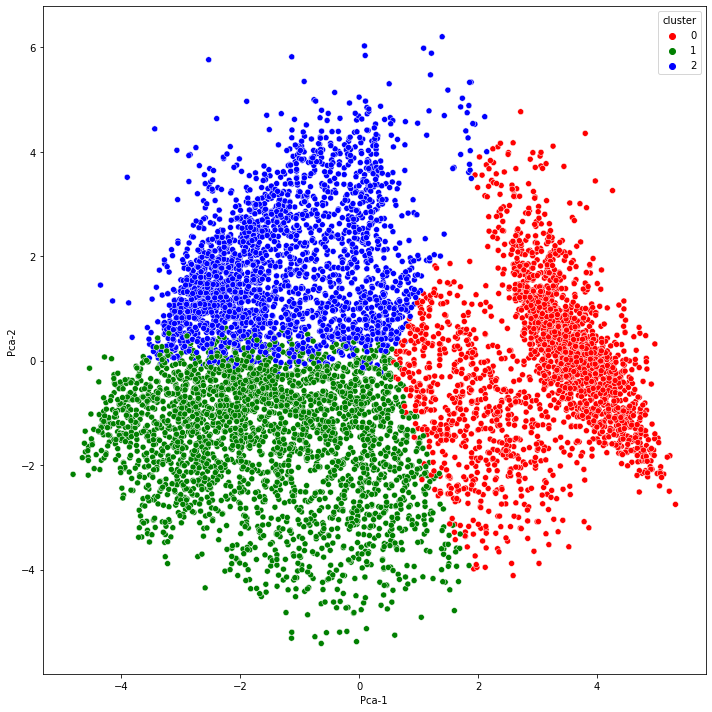

In [48]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="Pca-1", y="Pca-2", hue = "cluster", data = pca_df, palette =['red','green','blue'])
plt.show()

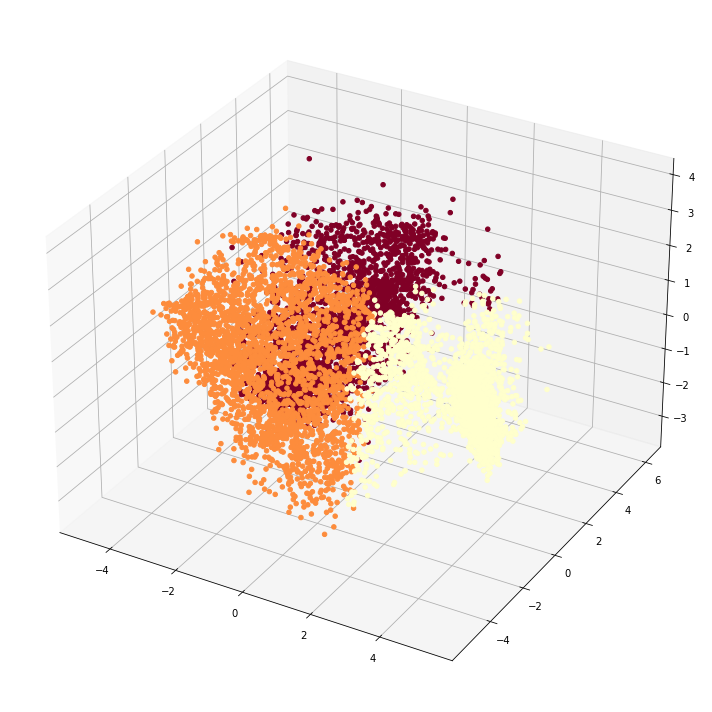

In [49]:
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(pca_df['Pca-1'], pca_df['Pca-2'], pca_df['Pca-3'], c=pca_df['cluster'], cmap='YlOrRd', alpha=1)
plt.show()

##### Based on above scatter plots we can say that there is minimal overlap between the clusters. But based on cluster center analysis, we can say that the clusters are dissimilar. But, Log transformation has not helped us build a better three cluster model because the three clusters formed without Log transformation had more standout values when compared to these ones.

##### Now that we have built a model for three clusters, let's build model for four clusters and see whether we get better results.

#### Step 3 (Re-execution): Let's build a model with K=4

In [50]:
kmeans = KMeans(4,random_state=43)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [51]:
kmeans.cluster_centers_.shape

(4, 17)

In [52]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.642362,0.118378,0.446968,-0.703875,0.913292,-0.731659,0.860154,-0.603187,1.093833,-0.629708,-0.675583,0.575179,-0.352428,-0.215536,-0.396697,0.578346,-0.020051
1,-0.987576,-1.251449,0.057986,0.185841,-0.465529,-0.672302,-0.642147,-0.184004,-0.661426,-0.619515,-0.656733,-0.406892,-0.184159,-0.662309,-0.814584,0.064544,-0.085718
2,0.434659,0.417107,0.816212,1.038931,0.525215,-0.123437,0.793674,1.132881,0.409911,-0.126334,-0.123686,0.939674,0.438135,0.492029,0.314816,-0.025499,0.161690
3,0.636265,0.238700,-1.187711,-0.621043,-0.935494,1.074293,-1.059046,-0.570579,-0.839243,0.969065,1.023087,-1.130897,-0.063749,0.064067,0.468398,-0.447977,-0.095707


##### Above cluster centres are created on the basis of scaled data. So, we inverse transform the data to get unscaled data.

In [53]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4.899905,0.914906,6.130305,0.908695,6.061345,0.548833,0.826644,0.025341,0.786936,0.012422,0.107396,2.607697,7.747052,6.299286,5.393547,0.240625,11.734731
1,4.261441,0.622609,5.034002,3.726448,1.897303,0.752523,0.231248,0.113233,0.097818,0.013759,0.124417,1.334681,7.876685,5.702154,4.958302,0.132316,11.682300
2,6.891822,0.978649,7.170982,6.428205,4.889352,2.635999,0.800297,0.389353,0.518427,0.078410,0.605742,3.080176,8.356093,7.244976,6.134616,0.113335,11.879838
3,7.264687,0.940580,1.523137,1.171027,0.478008,6.746107,0.066022,0.032178,0.028007,0.222006,1.641241,0.396184,7.969447,6.672988,6.294578,0.024277,11.674324


##### Above cluster centres are created on the basis of log transformation. So, we inverse log transformation the data to get unscaled data.

In [54]:
# Reversing log transformation

# Loop to transform cluster centres based on number of clusters formed
for i in cols_to_transform:
    for j in range(cluster_centers.shape[0]):
        # Subtracting '1' which was added while applying log transformation
        cluster_centers.iloc[:, i][j] = np.exp(cluster_centers.iloc[:, i][j])-1
    

# To view cluster centres
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,133.277012,0.914906,458.576277,1.481083,427.952033,0.731232,0.826644,0.025664,0.786936,0.012500,0.113375,12.567765,2313.738853,543.183136,218.982367,0.272044,11.734731
1,69.912115,0.622609,152.546259,40.531342,5.667888,1.122349,0.231248,0.119893,0.097818,0.013854,0.132488,2.798784,2634.123182,298.511965,141.351874,0.141469,11.682300
2,983.192707,0.978649,1300.121505,618.061800,131.867486,12.957255,0.800297,0.476026,0.518427,0.081566,0.832611,20.762234,4255.033325,1400.048819,460.561724,0.120007,11.879838
3,1427.937862,0.940580,3.586589,2.225303,0.612858,849.740759,0.066022,0.032701,0.028007,0.248579,4.161569,0.486143,2890.258289,789.754643,540.627284,0.024574,11.674324


##### Based on cluster centres, we will see whether we can find features of each cluster centre which will standout and represent that cluster.

##### Cluster-0:
    a. BALANCE_FREQUENCY: Cluster-0 has high value in 'BALANCE_FREQUENCY', so people in Cluster-0 do more number of transactions when compared to Cluster-0
    
    b. PURCHASES, ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES: By looking at these three values for Cluster-0, we can say that people in Cluster-0 do more number of purchase transactions. But the value of their            transactions are less. Also, they do more Instalment purchases.
    
    c. CASH_ADVANCE, CASH_ADVANCE_FREQUENCY & CASH_ADVANCE_TRX: By looking at all these three values for        Cluster-0, we can say that this group tends to do very less cash advance transactions
    
    d. CREDIT_LIMIT: Cluster-0 has the lowest credit limit. So, people in this group have more chances of defaul-ting the payments.
    
    e. MINIMUM_PAYMENTS & PRC_FULL_PAYMENT: By looking at these two values for Cluster-0, we can say that this  group tend to do more full payments than minimum payments.
    
    f. So, the marketing strategy for Cluster-0 would be to push ads which show that credit cards are easy and  convenient way to convert purchase transactions to instalments. But when payments are defaulted, they will  have severe impact on their credit score.

##### Cluster-1:
    a. BALANCE_FREQUENCY: Cluster-1 has the lowest value in 'BALANCE_FREQUENCY' when compared to respective     value in other clusters. So, people in Cluster-1 are dormant customers.
    
    b. PURCHASES, ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES: By looking at these three values for Cluster-1, we can say that people in Cluster-1 do very less purchase transactions
    
    c. CASH_ADVANCE, CASH_ADVANCE_FREQUENCY & CASH_ADVANCE_TRX: By looking at all these three values for        Cluster-1, we can say that people in Cluster-1 do very less Cash advance transactions
    
    d. CREDIT_LIMIT: Cluster-1 has the moderate credit limit. So, people in this group have less chances of defa-ulting.
    
    e. MINIMUM_PAYMENTS & PRC_FULL_PAYMENT: By looking at these two values for Cluster-1, we can say that this  group tend to do more full payments than minimum payments.
    
    f. People in this Cluster are dormant customers. So, the marketing strategy for Cluster-1 would be to push  ads which show that credit cards give them more offers on Purchases, whether it is One-off purchases or Inst-alment purchases. Also, they get one month time buffer to make the payments.

##### Cluster-2:
    a. BALANCE_FREQUENCY: Cluster-2 has the highest value in 'BALANCE_FREQUENCY' when compared to respective    value in other clusters. So, people in Cluster-2 are the most active customers.
    
    b. PURCHASES, ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES: By looking at these three values for Cluster-2, we can say that people in Cluster-2 do more purchase transactions when compared to people in any other cluster
    
    c. CASH_ADVANCE, CASH_ADVANCE_FREQUENCY & CASH_ADVANCE_TRX: By looking at all these three values for        Cluster-2, we can say that people in Cluster-2 do very minimal Cash advance transactions
    
    d. CREDIT_LIMIT: Cluster-2 has the highest credit limit. So, people in this group have very less chances of defaulting.
    
    e. MINIMUM_PAYMENTS & PRC_FULL_PAYMENT: By looking at these two values for Cluster-2, we can say that this  group tend to do similar amount of full payments and minimum payments.
    
    f. People in this Cluster are very active customers with highest number of purchase transactions. So, the   marketing strategy for Cluster-2 would be to push ads which show that credit cards give them more offers. Also, it gives them an opportunity of converting their purchase transactions to instalments at lesser interest rate.

##### Cluster-3:
    a. BALANCE_FREQUENCY: Cluster-3 has the larger value in 'BALANCE_FREQUENCY’. So, people in Cluster-3 are    active customers.
    
    b. PURCHASES, ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES: By looking at these three values for Cluster-3, we can say that people in Cluster-3 do very minimal purchases
    
    c. CASH_ADVANCE, CASH_ADVANCE_FREQUENCY & CASH_ADVANCE_TRX: By looking at all these three values for        Cluster-3, we can say that people in Cluster-3 do highest Cash advance transactions when compared to people in other clusters
    
    d. CREDIT_LIMIT: Cluster-3 has moderate credit limit. So, people in this group have less chances of defaulti-ng.
    
    e. MINIMUM_PAYMENTS & PRC_FULL_PAYMENT: By looking at these two values for Cluster-3, we can say that this  group tend to do more minimum payments than full payments
    
    f. People in this Cluster are active customers with highest number of Cash advance transactions. So, the mar-keting strategy for Cluster-3 would be to push ads which show that credit cards are easiest way to get Cash advances at a lesser interest rate.

##### The way it is with three cluster set, there are differences across these four clusters. But, the four clusters formed with Log transformation has split customers who do one-off purchases and Instalment purchases. So, we have got a better four cluster model with Log transformation.

#### Step 4 (Re-execution): We will add cluster labels to each observation so that is easy to identify which observation belongs to which cluster.

In [55]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.0


##### Let's get the number of observations in each cluster 

In [56]:
pd.crosstab(index=creditcard_df_cluster['cluster'], columns='count')

col_0,count
cluster,
0.0,1671
1.0,1320
2.0,2223
3.0,2220


##### Based on the count for each cluster, we can say that no. of observations are a bit similar across the clusters when compared to the four cluster set we got when we built the model without log transformation. Log transformation has distributed values similarly.

#### Step 5 (Re-execution): Visualise clusters and see whether there is any overlap between the clusters

##### Since we have already applied PCA, Let's drop the labels created while building K-means model with K=3 and add new labels created while building K-means model with K=4

In [57]:
# Dropping 'cluster' so that numbers given while building K-means model with K=3 will be dropped
pca_df.drop(['cluster'], axis='columns', inplace=True)

# Adding 'cluster' so that numbers given while building K-means model with K=4 will be added
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,Pca-1,Pca-2,Pca-3,cluster
0,0.051529,2.737165,-0.335728,1
1,3.771774,-0.916704,-0.156318,3
2,-1.389485,-1.755343,2.688355,2
3,1.292380,1.254380,1.894304,1
4,1.079470,1.281364,0.794582,1


##### Let's visualise clusters now

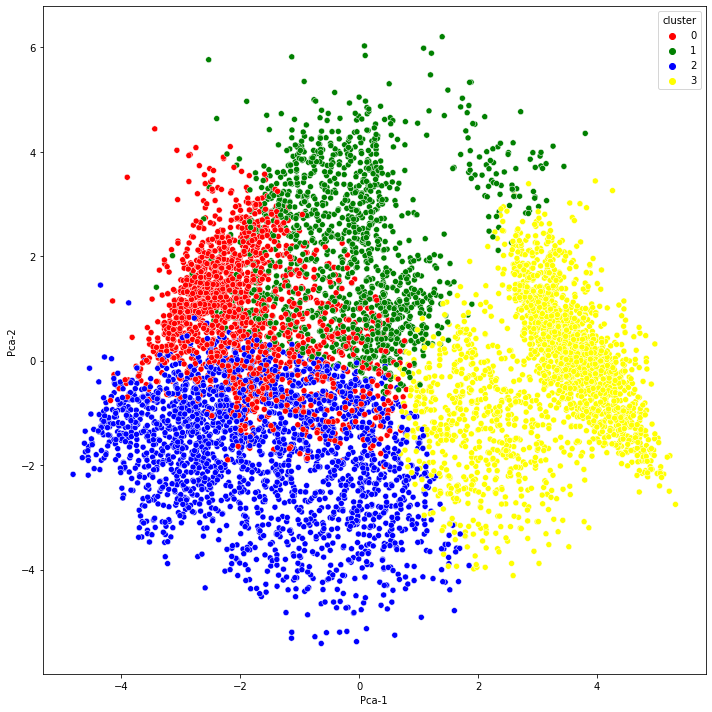

In [58]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="Pca-1", y="Pca-2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

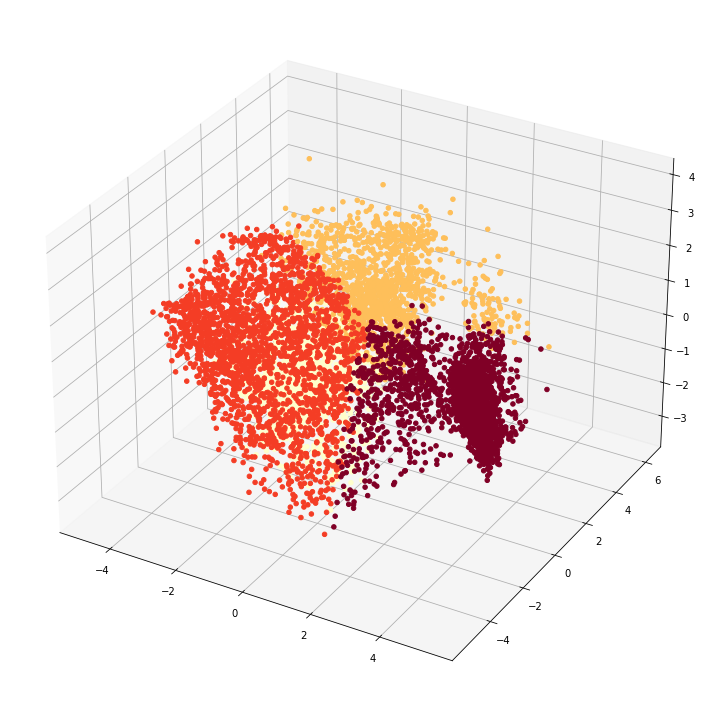

In [59]:
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(pca_df['Pca-1'], pca_df['Pca-2'], pca_df['Pca-3'], c=pca_df['cluster'], cmap='YlOrRd', alpha=1)
plt.show()

##### By looking into 2-D graph, there seems to be an overlap. Since we are tring to view 3-D graph on a 2-D screen, we are not getting to know clearly whether there is any overlap. But based on cluster center analysis, we can say that all the clusters are dissimilar. Also, Log transformation has helped us build a better four cluster model by giving seperate clusters for One-off purchases and Instalment purchases.

##### So based on analysis till now, we can say that building model without Log transformation has given us better results in the case of three clusters. But in the case of four clusters, model with Log transformation has given us better results. Also, in the case of four cluster model it has given seperate clusters for One-off purchases and Instalment purchases. Hence, we can confirm that Log transformation helps users when the attributes are right skewed in a few cases.